In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# XOR gate

### 1. OR gate

In [ ]:
x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [1]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

W = tf.Variable(tf.random_normal([3, 1]), tf.float32, name="weight")
    #> W에 한 자리 수 랜덤하게 넣어 값 찾기(정확한 값 위해 데이터 타입 지정)
b = tf.Variable(tf.random_normal([1]), tf.float32, name="bias")

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)  #> 참, 거짓 판별하는 이진분류
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        sess.run(train,feed_dict={X:x_data,y:y_data})
            
    h,p,a = sess.run([hypothesis,predict,accuracy],feed_dict={X:x_data,y:y_data})
    
print('가설',h,'\n예측',p,'\n정확도',a)

### 2. AND gate

In [ ]:
x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [0], [0], [0], [0], [0], [0], [1]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

W = tf.Variable(tf.random_normal([3, 1]), tf.float32, name="weight")
    #> W에 한 자리 수 랜덤하게 넣어 값 찾기(정확한 값 위해 데이터 타입 지정)
b = tf.Variable(tf.random_normal([1]), tf.float32, name="bias")

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)  #> 참, 거짓 판별하는 이진분류
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        sess.run(train, feed_dict={X:x_data,y:y_data})
            
    h, p, a = sess.run([hypothesis, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설: ', h, '\n예측: ', p, '\n정확도: ', a)

### 3. XOR gate

    - 인공지능이 외면받은 이유: 제대로 분류되지 않는다(정확도↓)
    
    - 깊은 학습의 필요성(hidden 계층)

In [ ]:
x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

W = tf.Variable(tf.random_normal([3, 1]), tf.float32, name="weight")
    #> W에 한 자리 수 랜덤하게 넣어 값 찾기(정확한 값 위해 데이터 타입 지정)
b = tf.Variable(tf.random_normal([1]), tf.float32, name="bias")

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)  #> 참, 거짓 판별하는 이진분류
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        sess.run(train, feed_dict={X:x_data,y:y_data})
            
    h, p, a = sess.run([hypothesis, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설: ', h, '\n예측: ', p, '\n정확도: ', a)

### 4. SVM

    - Support Vector Machine 이 더 잘 분류하기 때문에 인공지능 연구 필요성↓

In [ ]:
from sklearn import svm, metrics

x_data = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
          [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]]
y_data = [0, 1, 1, 1, 1, 1, 1, 0]

examples = [[1, 1, 1], [1, 0, 1]]
exam_labels = [0, 1]

clf = svm.SVC(C=100)
clf.fit(x_data, y_data)
pred = clf.predict(examples)

print(pred)
score = metrics.accuracy_score(exam_labels, pred)
print("정답률: ", score)

### 5. 딥러닝을 이용한 XOR

In [ ]:
## layer 추가 후 wide(입력과 연결 개수 증가) 통해 정확도 개선

x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

W1 = tf.Variable(tf.random_normal([3, 100]), tf.float32, name="weight1")  
    #> 입력으로 다시 전달. 연결의 개수(wide) 많은수록 학습량 많아진다
b1 = tf.Variable(tf.random_normal([100]), tf.float32, name="bias1")  #> 입력하는 개수 맞춤
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)  #> 활성화 함수를 통해 W2로 전달

W2 = tf.Variable(tf.random_normal([100, 1]), tf.float32, name="weight2")  
    #> X에서 3개 입력 - W1이 3개 입력받은 후 다시 W2로 100개 입력(연결의 개수 임의 지정) - W2가 100개 입력받은 후 1개 출력(y)
b2 = tf.Variable(tf.random_normal([1]), tf.float32, name="bias2")  #> 가중치 부여한 데이터를 다시 학습하기 위함
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)  #> 최종 출력으로 가설 수정

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1001):  #> layer 연결 수 조정 외에도 학습량을 늘리면 정확도 개선된다(layer 추가 없이는 정확도 개선↓)
        sess.run(train, feed_dict={X:x_data,y:y_data})
            
    h, p, a = sess.run([hypothesis, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설: ', h, '\n예측: ', p, '\n정확도: ', a)

In [ ]:
## layer 추가 후 연결 개수 증가 외에 학습량 증가에도 정확도 개선 가능

x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

W1 = tf.Variable(tf.random_normal([3, 2]), tf.float32, name="weight1")  
b1 = tf.Variable(tf.random_normal([2]), tf.float32, name="bias1")  
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)  #> 활성화 함수를 통해 W2로 전달

W2 = tf.Variable(tf.random_normal([2, 1]), tf.float32, name="weight2")  
b2 = tf.Variable(tf.random_normal([1]), tf.float32, name="bias2")  #> 가중치 부여한 데이터를 다시 학습하기 위함
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)  #> 최종 출력으로 가설 수정

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):  #> layer 연결 수 조정 외에도 학습량을 늘리면 정확도 개선된다(layer 추가 없이는 정확도 개선↓)
        sess.run(train, feed_dict={X:x_data,y:y_data})
            
    h, p, a = sess.run([hypothesis, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설 확신: ', h, '\n예측 값: ', p, '\n정확도: ', a)

In [ ]:
## wide 증가 통해 가설확신 값 증가

x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

W1 = tf.Variable(tf.random_normal([3, 10]), tf.float32, name="weight1")  
b1 = tf.Variable(tf.random_normal([10]), tf.float32, name="bias1")  
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)  #> 활성화 함수를 통해 W2로 전달

W2 = tf.Variable(tf.random_normal([10, 1]), tf.float32, name="weight2")  
b2 = tf.Variable(tf.random_normal([1]), tf.float32, name="bias2")  #> 가중치 부여한 데이터를 다시 학습하기 위함
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)  #> 최종 출력으로 가설 수정

cost = -tf.reduce_mean(y * tf.log(layer2) + (1 - y) * tf.log(1 - layer2))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(layer2 > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):  #> layer 연결 수 조정 외에도 학습량을 늘리면 정확도 개선된다(layer 추가 없이는 정확도 개선↓)
        sess.run(train, feed_dict={X:x_data,y:y_data})
            
    h, p, a = sess.run([layer2, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설 확신: ', h, '\n예측 값: ', p, '\n정확도: ', a)  #> wide 증가 통해 가설확신 값 증가

In [ ]:
## Deep하게 연결(layer 증가)

x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> None 데이터 입력 갯수에 상관 없이 처리

W1 = tf.Variable(tf.random_normal([3, 10]), tf.float32, name="weight1")  
b1 = tf.Variable(tf.random_normal([10]), tf.float32, name="bias1")  
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)  

W2 = tf.Variable(tf.random_normal([10, 11]), tf.float32, name="weight2")  
b2 = tf.Variable(tf.random_normal([11]), tf.float32, name="bias2")  #> 가중치 부여한 데이터를 다시 학습하기 위함
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)  

W3 = tf.Variable(tf.random_normal([11, 8]), tf.float32, name="weight3")  
b3 = tf.Variable(tf.random_normal([8]), tf.float32, name="bias3")  #> 가중치 부여한 데이터를 다시 학습하기 위함
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)  

W4 = tf.Variable(tf.random_normal([8, 1]), tf.float32, name="weight4")  
b4 = tf.Variable(tf.random_normal([1]), tf.float32, name="bias4")  #> 가중치 부여한 데이터를 다시 학습하기 위함
layer4 = tf.sigmoid(tf.matmul(layer3, W4) + b4)  #> 최종 출력으로 가설 수정

cost = -tf.reduce_mean(y * tf.log(layer4) + (1 - y) * tf.log(1 - layer4))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(layer4 > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001): 
        sess.run(train, feed_dict={X:x_data,y:y_data})
            
    h, p, a = sess.run([layer4, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설 확신: ', h, '\n예측 값: ', p, '\n정확도: ', a)

## 텐서보드(Tensor Board)

In [ ]:
x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

W1 = tf.Variable(tf.random_normal([3, 100]), tf.float32, name="weight1")  
b1 = tf.Variable(tf.random_normal([100]), tf.float32, name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)  #> 활성화 함수를 통해 W2로 전달

W2 = tf.Variable(tf.random_normal([100, 1]), tf.float32, name="weight2")  
b2 = tf.Variable(tf.random_normal([1]), tf.float32, name="bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)  #> 최종 출력으로 가설 수정

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

tf.summary.scalar("cost", cost)  #> 하나의 값 확인 위해 scalar() 사용

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()  #> summary 한 값들을 모두 취합하여 보기 위함
    writer = tf.summary.FileWriter("log_dir")  #> 웹서버에 불러서 실행 위해 파일로 저장
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        _, summary = sess.run([train, merged_summary], feed_dict={X:x_data, y:y_data})  #> train 외에 merged_summary 값도 받아야 한다
        writer.add_summary(summary, global_step=step)
            
    h, p, a = sess.run([hypothesis, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설: ', h, '\n예측: ', p, '\n정확도: ', a)

cmd > tensorboard --logdir = log_dir

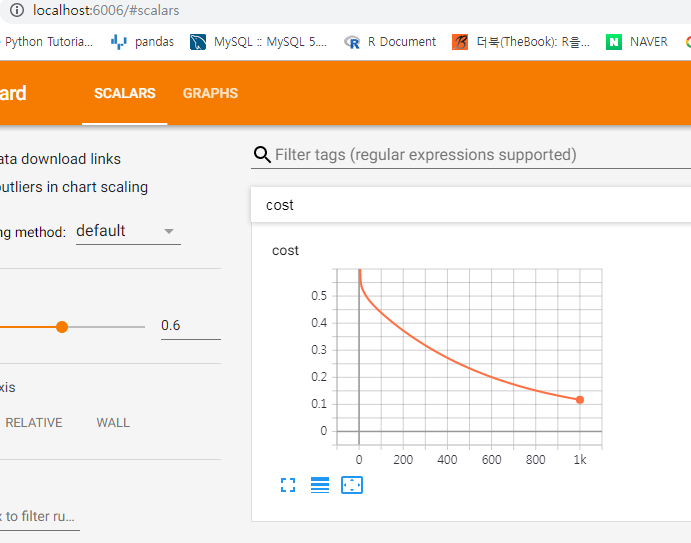

In [ ]:
x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

with tf.name_scope("layer1"):  #> tensorboard로 확인시 layer 확인 위해 with로 묶어서 표현
    W1 = tf.Variable(tf.random_normal([3, 100]), tf.float32, name="weight1")  
    b1 = tf.Variable(tf.random_normal([100]), tf.float32, name="bias1")
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)  #> 활성화 함수를 통해 W2로 전달

    tf.summary.histogram("weight1", W1)
    tf.summary.histogram("bias1", b1)  #> 보고 싶은 값 tf.summary()로 표시
    tf.summary.histogram("layer1", layer1)
    
with tf.name_scope("layer2"):
    W2 = tf.Variable(tf.random_normal([100, 1]), tf.float32, name="weight2")  
    b2 = tf.Variable(tf.random_normal([1]), tf.float32, name="bias2")
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)  #> 최종 출력으로 가설 수정
    
    tf.summary.histogram("weight2", W2)
    tf.summary.histogram("bias2", b2)  #> 보고 싶은 값 tf.summary()로 표시
    tf.summary.histogram("layer2", hypothesis)

with tf.name_scope("cost"):
    cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
    
    tf.summary.scalar("cost", cost)  #> 하나의 값 확인 위해 scalar() 사용

with tf.name_scope("train"):
    train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

tf.summary.scalar("accuracy", accuracy)

with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()  #> summary 한 값들을 모두 취합하여 보기 위함
    writer = tf.summary.FileWriter("log_dir")  #> 웹서버에 불러서 실행 위해 파일로 저장
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        _, summary = sess.run([train, merged_summary], feed_dict={X:x_data, y:y_data})  #> train 외에 merged_summary 값도 받아야 한다
        writer.add_summary(summary, global_step=step)
            
    h, p, a = sess.run([hypothesis, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설: ', h, '\n예측: ', p, '\n정확도: ', a)

tensorboard 그래프

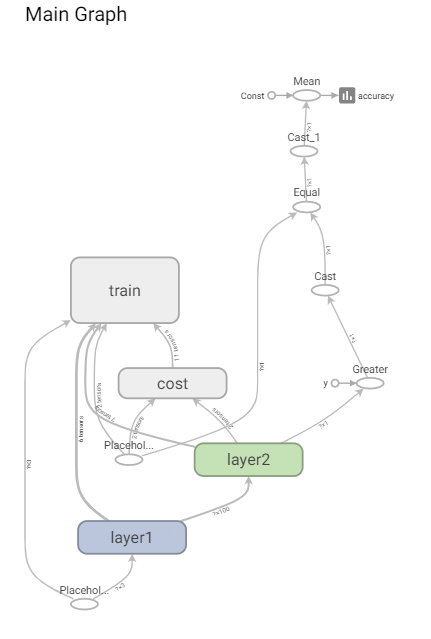

In [ ]:
## running_rate 값이 0.1 vs 0.01 일 때 비교

x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

with tf.name_scope("layer1"):  #> tensorboard로 확인시 layer 확인 위해 with로 묶어서 표현
    W1 = tf.Variable(tf.random_normal([3, 100]), tf.float32, name="weight1")  
    b1 = tf.Variable(tf.random_normal([100]), tf.float32, name="bias1")
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)  #> 활성화 함수를 통해 W2로 전달

    tf.summary.histogram("weight1", W1)
    tf.summary.histogram("bias1", b1)  #> 보고 싶은 값 tf.summary()로 표시
    tf.summary.histogram("layer1", layer1)
    
with tf.name_scope("layer2"):
    W2 = tf.Variable(tf.random_normal([100, 1]), tf.float32, name="weight2")  
    b2 = tf.Variable(tf.random_normal([1]), tf.float32, name="bias2")
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)  #> 최종 출력으로 가설 수정
    
    tf.summary.histogram("weight2", W2)
    tf.summary.histogram("bias2", b2)  #> 보고 싶은 값 tf.summary()로 표시
    tf.summary.histogram("layer2", hypothesis)

with tf.name_scope("cost"):
    cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
    
    tf.summary.scalar("cost", cost)  #> 하나의 값 확인 위해 scalar() 사용

with tf.name_scope("train"):
    train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

tf.summary.scalar("accuracy", accuracy)

with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()  #> summary 한 값들을 모두 취합하여 보기 위함
    writer = tf.summary.FileWriter("log_dir2/alpha01")  #> 웹서버에 불러서 실행 위해 파일로 저장
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, summary = sess.run([train, merged_summary], feed_dict={X:x_data, y:y_data})  #> train 외에 merged_summary 값도 받아야 한다
        writer.add_summary(summary, global_step=step)
            
    h, p, a = sess.run([hypothesis, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설: ', h, '\n예측: ', p, '\n정확도: ', a)

In [ ]:
x_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                  [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])  #> 데이터 입력 갯수에 상관 없이 처리

with tf.name_scope("layer1"):  #> tensorboard로 확인시 layer 확인 위해 with로 묶어서 표현
    W1 = tf.Variable(tf.random_normal([3, 100]), tf.float32, name="weight1")  
    b1 = tf.Variable(tf.random_normal([100]), tf.float32, name="bias1")
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)  #> 활성화 함수를 통해 W2로 전달

    tf.summary.histogram("weight1", W1)
    tf.summary.histogram("bias1", b1)  #> 보고 싶은 값 tf.summary()로 표시
    tf.summary.histogram("layer1", layer1)
    
with tf.name_scope("layer2"):
    W2 = tf.Variable(tf.random_normal([100, 1]), tf.float32, name="weight2")  
    b2 = tf.Variable(tf.random_normal([1]), tf.float32, name="bias2")
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)  #> 최종 출력으로 가설 수정
    
    tf.summary.histogram("weight2", W2)
    tf.summary.histogram("bias2", b2)  #> 보고 싶은 값 tf.summary()로 표시
    tf.summary.histogram("layer2", hypothesis)

with tf.name_scope("cost"):
    cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
    
    tf.summary.scalar("cost", cost)  #> 하나의 값 확인 위해 scalar() 사용

with tf.name_scope("train"):
    train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 그래프 작업

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

tf.summary.scalar("accuracy", accuracy)

with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()  #> summary 한 값들을 모두 취합하여 보기 위함
    writer = tf.summary.FileWriter("log_dir2/alpha001")  #> 웹서버에 불러서 실행 위해 파일로 저장
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, summary = sess.run([train, merged_summary], feed_dict={X:x_data, y:y_data})  #> train 외에 merged_summary 값도 받아야 한다
        writer.add_summary(summary, global_step=step)
            
    h, p, a = sess.run([hypothesis, predict, accuracy],feed_dict={X:x_data, y:y_data})
    
print('가설: ', h, '\n예측: ', p, '\n정확도: ', a)

각 커널 재시작 후 실행해야 한다

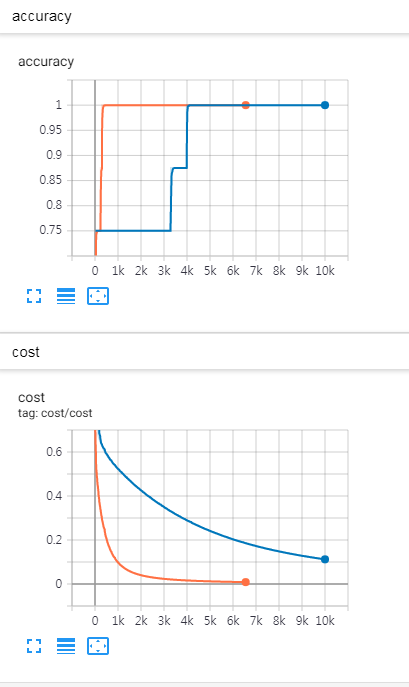

# Relu

    - 최대값을 최대한으로 쓸 수 있도록(Gradient Decent 문제 해결책)
    
    - 그 외 Backpropagation 문제(Gradient Decent) 해결 알고리즘
        : tanh 
        : max_out
        
    - 다른 해결 방법: 초기값 부여
        : xavier 초기화
        
    - 과적합 해결: 정규화, dropout

In [2]:
import random
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)   #> 난수 고정

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
### MNIST의 비용 출력 ###

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.random_normal([784, 10]), tf.float32, name="weight")
b = tf.Variable(tf.random_normal([10]), tf.float32, name="bias")
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)

is_corrected = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))  #> 두 개가 같은지 다른지 확인
accuracy = tf.reduce_mean(tf.cast(is_corrected, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 30
batch_size = 200

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0  #> 평균 비용이 잘 줄어들고 있는지 파악 위함
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #> 전체 데이터를 100개씩(batch_size) 나눠서 가져온다
        c, _ = sess.run([cost, train], feed_dict={X:batch_xs, y:batch_ys})
        avg_cost += c/total_batch
        
    print("Epoch: ", (epoch + 1), "cost: ", avg_cost)

print("훈련 종료")

In [ ]:
# 모델 성능 측정

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels}))

In [ ]:
# layer 추가 후 relu

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

W1 = tf.Variable(tf.random_normal([784, 256]), tf.float32, name="weight1")
b1 = tf.Variable(tf.random_normal([256]), tf.float32, name="bias1")
logits1 = tf.matmul(X, W1) + b1
layer1 = tf.nn.relu(logits1)

W2 = tf.Variable(tf.random_normal([256, 256]), tf.float32, name="weight")
b2 = tf.Variable(tf.random_normal([256]), tf.float32, name="bias")
logits2 = tf.matmul(layer1, W2) + b2
layer2 = tf.nn.relu(logits2)

W3 = tf.Variable(tf.random_normal([256, 10]), tf.float32, name="weight")
b3 = tf.Variable(tf.random_normal([10]), tf.float32, name="bias")
logits3 = tf.matmul(layer2, W3) + b3
hypothesis = tf.nn.softmax(logits3)  #> 마지막 레이어만 softmax

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits3, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

is_corrected = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))  #> 두 개가 같은지 다른지 확인
accuracy = tf.reduce_mean(tf.cast(is_corrected, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 30
batch_size = 200

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0  #> 평균 비용이 잘 줄어들고 있는지 파악 위함
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #> 전체 데이터를 100개씩(batch_size) 나눠서 가져온다
        c, _ = sess.run([cost, train], feed_dict={X:batch_xs, y:batch_ys})
        avg_cost += c/total_batch
        
    print("Epoch: ", (epoch + 1), "cost: ", avg_cost)

print("훈련 종료")

In [ ]:
# 모델 성능 측정: layer 추가에 따른 효과x. relu로 변환에 따라 정확도 향상

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels}))

In [ ]:
# xavier 초기값 부여

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

W1 = tf.get_variable("W1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
    #> get_variable() 통해 초기값 부여(초기값 랜덤 적용x)
b1 = tf.Variable(tf.random_normal([256]), tf.float32, name="bias1")
logits1 = tf.matmul(X, W1) + b1
layer1 = tf.nn.relu(logits1)

W2 = tf.get_variable("W2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), tf.float32, name="bias")
logits2 = tf.matmul(layer1, W2) + b2
layer2 = tf.nn.relu(logits2)

W3 = tf.get_variable("W3", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), tf.float32, name="bias")
logits3 = tf.matmul(layer2, W3) + b3
hypothesis = tf.nn.softmax(logits3)  #> 마지막 레이어만 softmax

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits3, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

is_corrected = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))  #> 두 개가 같은지 다른지 확인
accuracy = tf.reduce_mean(tf.cast(is_corrected, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 30
batch_size = 200

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0  #> 평균 비용이 잘 줄어들고 있는지 파악 위함
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #> 전체 데이터를 100개씩(batch_size) 나눠서 가져온다
        c, _ = sess.run([cost, train], feed_dict={X:batch_xs, y:batch_ys})
        avg_cost += c/total_batch
        
    print("Epoch: ", (epoch + 1), "cost: ", avg_cost)

print("훈련 종료")

In [ ]:
# 모델 성능 측정: 

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels}))

In [ ]:
# deep & wide : 깊이 7 layer, 너비 512

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

W1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias1")
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias3")
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias4")
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias5")
layer5 = tf.nn.relu(tf.matmul(layer4, W5) + b5)

W6 = tf.get_variable("W6", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias6")
layer6 = tf.nn.relu(tf.matmul(layer5, W6) + b6)

W7 = tf.get_variable("W7", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([10]), tf.float32, name="bias7")
logits = tf.matmul(layer6, W7) + b7
hypothesis = tf.nn.softmax(logits) 

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

is_corrected = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))  #> 두 개가 같은지 다른지 확인
accuracy = tf.reduce_mean(tf.cast(is_corrected, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 30
batch_size = 200

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0  #> 평균 비용이 잘 줄어들고 있는지 파악 위함
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #> 전체 데이터를 100개씩(batch_size) 나눠서 가져온다
        c, _ = sess.run([cost, train], feed_dict={X:batch_xs, y:batch_ys})
        avg_cost += c/total_batch
        
    print("Epoch: ", (epoch + 1), "cost: ", avg_cost)

print("훈련 종료")

In [ ]:
# 모델 성능 측정: 

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels}))

# dropout

    - 과적합 문제 해결 위함: 적당한 연결로만 훈련, 실제 데이터는 전체로 확인

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

keep_prob = tf.placeholder(tf.float32)  #> 훈련에서만 일정량으로 훈련, 실제에서는 전체로 확인

W1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias1")
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias3")
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias4")
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)
layer4 = tf.nn.dropout(layer4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias5")
layer5 = tf.nn.relu(tf.matmul(layer4, W5) + b5)
layer5 = tf.nn.dropout(layer5, keep_prob=keep_prob)

W6 = tf.get_variable("W6", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias6")
layer6 = tf.nn.relu(tf.matmul(layer5, W6) + b6)
layer6 = tf.nn.dropout(layer6, keep_prob=keep_prob)

W7 = tf.get_variable("W7", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([10]), tf.float32, name="bias7")
logits = tf.matmul(layer6, W7) + b7
hypothesis = tf.nn.softmax(logits) 
hypothesis = tf.nn.dropout(hypothesis, keep_prob=keep_prob)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_corrected = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))  #> 두 개가 같은지 다른지 확인
accuracy = tf.reduce_mean(tf.cast(is_corrected, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 30
batch_size = 200

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0  #> 평균 비용이 잘 줄어들고 있는지 파악 위함
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #> 전체 데이터를 100개씩(batch_size) 나눠서 가져온다
        c, _ = sess.run([cost, train], feed_dict={X:batch_xs, y:batch_ys, keep_prob:0.7})  #> 70%의 양으로 훈련
        avg_cost += c/total_batch
        
    print("Epoch: ", (epoch + 1), "cost: ", avg_cost)

print("훈련 종료")

In [ ]:
# 모델 성능 측정: 

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels, keep_prob:1}))
    #> 실제 테스트는 전체량으로 훈련

In [3]:
# adam optimizer 사용

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

keep_prob = tf.placeholder(tf.float32)  #> 훈련에서만 일정량으로 훈련, 실제에서는 전체로 확인

W1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias1")
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias3")
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias4")
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)
layer4 = tf.nn.dropout(layer4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias5")
layer5 = tf.nn.relu(tf.matmul(layer4, W5) + b5)
layer5 = tf.nn.dropout(layer5, keep_prob=keep_prob)

W6 = tf.get_variable("W6", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([512]), tf.float32, name="bias6")
layer6 = tf.nn.relu(tf.matmul(layer5, W6) + b6)
layer6 = tf.nn.dropout(layer6, keep_prob=keep_prob)

W7 = tf.get_variable("W7", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([10]), tf.float32, name="bias7")
logits = tf.matmul(layer6, W7) + b7
hypothesis = tf.nn.softmax(logits) 
hypothesis = tf.nn.dropout(hypothesis, keep_prob=keep_prob)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

is_corrected = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))  #> 두 개가 같은지 다른지 확인
accuracy = tf.reduce_mean(tf.cast(is_corrected, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 30
batch_size = 200

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0  #> 평균 비용이 잘 줄어들고 있는지 파악 위함
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #> 전체 데이터를 100개씩(batch_size) 나눠서 가져온다
        c, _ = sess.run([cost, train], feed_dict={X:batch_xs, y:batch_ys, keep_prob:0.7})  #> 70%의 양으로 훈련
        avg_cost += c/total_batch
        
    print("Epoch: ", (epoch + 1), "cost: ", avg_cost)

print("훈련 종료")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch:  1 cost:  0.811545745351098
Epoch:  2 cost:  0.2206937306035649
Epoch:  3 cost:  0.16469925952228648
Epoch:  4 cost:  0.13314528973265136
Epoch:  5 cost:  0.1161838661337442
Epoch:  6 cost:  0.10396769390187473
Epoch:  7 cost:  0.09017724817449398
Epoch:  8 cost:  0.08446832315149629
Epoch:  9 cost:  0.07811573829163204
Epoch:  10 cost:  0.07067586931992662
Epoch:  11 cost:  0.067904711836441
Epoch:  12 cost:  0.0631238335201686
Epoch:  13 cost:  0.060753726569766256
Epoch:  14 cost:  0.059943281977691484
Epoch:  15 cost:  0.05263829193331976
Epoch:  16 cost:  0.05285253146663308
Epoch:  17 cost:  0.052888601000674745
Epoch:  18 cost:  0.04728808986912057
Epoch:  19 cost:  0.045

In [4]:
# 모델 성능 측정: 

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels, keep_prob:1}))
    #> 실제 테스트는 전체량으로 훈련

Accuracy: 0.981
